# HSE Data Analytics for Beginners

This notebook is designed for beginners who want to explore the basics of Health, Safety, and Environment (HSE) data analytics. It introduces key concepts such as data preprocessing, statistical analysis, and data visualization in a beginner-friendly format.

Through this analysis, we aim to uncover insights into the causes of industrial accidents and highlight practical measures for prevention—such as enforcing safety protocols, offering proper training, and proactively identifying workplace hazards.

The notebook serves as a starting point for those new to HSE analytics, providing foundational knowledge while demonstrating how to work with data in a Notebook environment. For those who wish to dive deeper, a wide range of additional resources are available to support continued learning.

My goal is to both analyze the dataset to better understand accident trends and to guide beginners through the process of using Notebooks effectively for data analysis.

## A. Overview of Dataset

    Data: Timestamp or time/date information

    Countries : Country of the accident occurrence (anonymized)

    Local: City of accident occurence (anonymized)

    Industry Sector: Industrial sector of accident occurence

    Accident Level: from I to VI, it indicates the severity of the accident

    Potential Accident Level : This captures the potential for escalation of the accident

    Genre : The gender of the injured party, whether male or female

    Employee ou Terceiro : Worker classification if the injured party is an employee or a third party (Contractor)

    Risco Critico : Description of the agency and immediate cause of the accident

    Description : Detailed description of how the accident occured

    Note:

    Accident Level (Severity) Classification Since Levels I and IV are provided, we can infer the following;

        Level 1 (I): Minor Accident
        Level 2 (II): Moderate Accident
        Level 3 (III): Major Accident
        Level 4 (IV): Serious Accident
        Level 5 (V): Severe Accident
        Level 6 (VI): Catastrophic Accident

    Potential Accident Level (Severity) Classification: We infer the following;

        Level 1 (I): Low Potential
        Level 2 (II): Moderate Potential
        Level 3 (III): High Potential
        Level 4 (V): Very High Potential
        Level 5 (V): Extreme Potential
        Level 6 (VI): Critical Potential



## B. Libraries Importation
Step 1 Requirement in Data Analysis is to import necessary libraries

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import roman
import dash
from dash import dcc, html, Input, Output
import plotly.express as px
import scipy.stats as stats
from sklearn.linear_model import LogisticRegression



    import keyword tells Python to load the library into the current namespace. This allows us to use the functions and classes from the library in our code.

    By importing the libraries at the top of the code, we can avoid having to import them every time we need to use them. This makes the code more concise and easier to read.

        pandas: This library is used to read and manipulate dataframes. Dataframes are a type of data structure that is used to store and organise data.
        matplotlib: This library is used to create and customise plots. Plots are a visual way to represent data.
        numpy: This library is used to perform mathematical operations.
        scipy.stats: This library is used to calculate statistical distributions.
        sklearn.linear_model: This library is used to train and evaluate machine learning models.



## C. Dataset Load
Step 2 Requirement is to load the dataset

In [29]:
HSE_df = pd.read_csv('IHMStefanini_industrial_safety_and_health_database.csv')
HSE_df

,Data,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee ou Terceiro,Risco Critico
0,2016-01-01 00:00:00,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed
1,2016-01-02 00:00:00,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems
2,2016-01-06 00:00:00,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools
3,2016-01-08 00:00:00,Country_01,Local_04,Mining,I,I,Male,Third Party,Others
4,2016-01-10 00:00:00,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others
...,...,...,...,...,...,...,...,...,...
434,2017-07-04 00:00:00,Country_01,Local_04,Mining,I,III,Male,Third Party,Others
435,2017-07-04 00:00:00,Country_01,Local_03,Mining,I,II,Female,Employee,Others
436,2017-07-05 00:00:00,Country_02,Local_09,Metals,I,II,Male,Employee,Venomous Animals
437,2017-07-06 00:00:00,Country_02,Local_05,Metals,I,II,Male,Employee,Cut


Hints

The pd.read_csv() function reads the CSV file into a DataFrame. The pd prefix tells Python that we are using the pandas library.

The read_csv() function takes the path to the CSV file as an argument.

## D. Data PreProcessing

Step 3 in this analysis is to preprocess the data. This requires cleaning,modifying and checking the data types of the columns, calculating the descriptive statistics for the dataset.

### Conversion of Data Types¶

This is because the Data column contains dates and times, and it is important to store these values in the correct data type so that they can be manipulated and analysed correctly.


In [34]:
# Convert the columns to the correct data types
HSE_df["Accident Level"] = HSE_df["Accident Level"].astype("category")
HSE_df["Potential Accident Level"] = HSE_df["Potential Accident Level"].astype("category")
HSE_df["Genre"] = HSE_df["Genre"].astype("category")
HSE_df["Risco Critico"] = HSE_df["Risco Critico"].astype("category")

# Print the first few rows of the DataFrame
HSE_df.head()

,Data,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee ou Terceiro,Risco Critico
0,2016-01-01 00:00:00,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed
1,2016-01-02 00:00:00,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems
2,2016-01-06 00:00:00,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools
3,2016-01-08 00:00:00,Country_01,Local_04,Mining,I,I,Male,Third Party,Others
4,2016-01-10 00:00:00,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others


In [35]:
# Convert the Data column to a datetime format
HSE_df["Data"] = pd.to_datetime(HSE_df["Data"])

# Get the day, month and year of each accident
HSE_df["day"] = HSE_df["Data"].dt.day
HSE_df["month"] = HSE_df["Data"].dt.month
HSE_df["year"] = HSE_df["Data"].dt.year

# Group the DataFrame by month and count the number of accidents in each month
accidents_by_month = HSE_df.groupby('month').size() # Plot the distribution of accident levels

## Renaming Columns and Values¶

In [37]:
# Rename the columns
HSE_df.rename(columns={
    "Data": "Date",
    "Countries": "Country",
    "Local": "Location",
    "Genre": "Gender",
    "Employee ou Terceiro":"Employee or Contractor",
    "Risco Critico": "Critical Risk"
}, inplace=True)

# Replaces all instances of the value 'Third Party' in the 'Employee or Contractor' column with 'Contractor'.
HSE_df["Employee or Contractor"] = HSE_df["Employee or Contractor"].replace("Third Party", "Contractor")
HSE_df["Employee or Contractor"] = HSE_df["Employee or Contractor"].replace("Third Party (Remote)", "Contractor (Remote)")

# Replaces the value'\nNot applicable' with 'Not applicable' in the 'Critical Risk' column.
HSE_df["Critical Risk"] = HSE_df["Critical Risk"].replace("\nNot applicable", "Not applicable")

# Print the first few rows of the DataFrame
HSE_df.head()

/var/folders/cx/3xbqgm4531z6xckd4k0mxmp40000gn/T/ipykernel_87983/3574809653.py:16: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  HSE_df["Critical Risk"] = HSE_df["Critical Risk"].replace("\nNot applicable", "Not applicable")


,Date,Country,Location,Industry Sector,Accident Level,Potential Accident Level,Gender,Employee or Contractor,Critical Risk,day,month,year
0,2016-01-01,Country_01,Local_01,Mining,I,IV,Male,Contractor,Pressed,1,1,2016
1,2016-01-02,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,2,1,2016
2,2016-01-06,Country_01,Local_03,Mining,I,III,Male,Contractor (Remote),Manual Tools,6,1,2016
3,2016-01-08,Country_01,Local_04,Mining,I,I,Male,Contractor,Others,8,1,2016
4,2016-01-10,Country_01,Local_04,Mining,IV,IV,Male,Contractor,Others,10,1,2016


In [38]:
# Convert Accident level and Potential Accident Levels from Roman numerals to Numbers

HSE_df["Accident Level"] = HSE_df["Accident Level"].apply(roman.fromRoman)
HSE_df["Potential Accident Level"] = HSE_df["Potential Accident Level"].apply(roman.fromRoman)

# Print the first few rows of the DataFrame

HSE_df.head()

,Date,Country,Location,Industry Sector,Accident Level,Potential Accident Level,Gender,Employee or Contractor,Critical Risk,day,month,year
0,2016-01-01,Country_01,Local_01,Mining,1,4,Male,Contractor,Pressed,1,1,2016
1,2016-01-02,Country_02,Local_02,Mining,1,4,Male,Employee,Pressurized Systems,2,1,2016
2,2016-01-06,Country_01,Local_03,Mining,1,3,Male,Contractor (Remote),Manual Tools,6,1,2016
3,2016-01-08,Country_01,Local_04,Mining,1,1,Male,Contractor,Others,8,1,2016
4,2016-01-10,Country_01,Local_04,Mining,4,4,Male,Contractor,Others,10,1,2016


In [39]:
# Check the data types of the columns
for column in HSE_df.columns:
    print(column, HSE_df[column].dtype)

Date datetime64[ns]
Country object
Location object
Industry Sector object
Accident Level category
Potential Accident Level category
Gender category
Employee or Contractor object
Critical Risk category
day int32
month int32
year int32


Hint

    rename() method of the DataFrame takes a dictionary as an argument. The dictionary maps the old column names to the new column names.

    inplace=True argument tells the rename() method to update the DataFrame in place. This means that the changes will be made to the original DataFrame, and a new DataFrame will not be created.

    head() method of the DataFrame returns the first few rows of the DataFrame.

### Statistical Analysis

The next step was to perform a statistical analysis of the data. This involved generating a report of the statistical analysis, which includes the following information:

    The frequency distribution of categorical columns
    The descriptive statistics
    The correlation between the different variables
    The correlation between the different variables

In [42]:
# Calculate the frequency distribution for the categorical columns
for column in HSE_df.select_dtypes(include=["object", "category"]):
     print(column, HSE_df[column].value_counts())

Country Country
Country_01    263
Country_02    132
Country_03     44
Name: count, dtype: int64
Location Location
Local_03    90
Local_05    59
Local_06    58
Local_01    57
Local_04    56
Local_10    44
Local_08    29
Local_02    24
Local_07    14
Local_12     4
Local_09     2
Local_11     2
Name: count, dtype: int64
Industry Sector Industry Sector
Mining    241
Metals    148
Others     50
Name: count, dtype: int64
Accident Level Accident Level
1    328
2     40
3     31
4     31
5      9
Name: count, dtype: int64
Potential Accident Level Potential Accident Level
4    155
3    106
2     95
1     49
5     33
6      1
Name: count, dtype: int64
Gender Gender
Male      417
Female     22
Name: count, dtype: int64
Employee or Contractor Employee or Contractor
Contractor             189
Employee               181
Contractor (Remote)     69
Name: count, dtype: int64
Critical Risk Critical Risk
Others                                       232
Pressed                                       24
Ma

In [43]:
# Generate a report of the statistical analysis
report = pd.DataFrame()
for column in HSE_df.columns:
    value = HSE_df[column].describe()
    value["Frequency"] = HSE_df[column].value_counts()
    report[column] = value
    
# Print the report
print(report.to_string())

                                                                                                                                                                                                                                             Date                                                                                  Country                                                                                                                                                                                                                Location                                                                      Industry Sector                                                                         Accident Level                                                                                  Potential Accident Level                                                        Gender                                                                                                             Emplo

Analysis: The data shows that there were 439 accidents reported over a two-year period. On February 26, 2016, the highest number of daily accident cases were reported, with a total of 13 reported.

### Correlation Coefficient between Accident Level and Potential Accident Level

The correlation coefficient is a measure of the linear relationship between two variables. A correlation coefficient of 1 indicates a perfect positive correlation, a correlation coefficient of -1 indicates a perfect negative correlation, and a correlation coefficient of 0 indicates no correlation.


In [46]:
# Calculate the correlation coefficient between the accident level and the potential accident level
correlation_coefficient = HSE_df['Accident Level'].corr(HSE_df['Potential Accident Level'])

# Print the correlation coefficient
print ()
print ()
print("The correlation coefficient between the accident level and the potential accident level is:", correlation_coefficient)



The correlation coefficient between the accident level and the potential accident level is: 0.49391293188063884


### Analysis

The correlation coefficient between the accident level and the potential accident level is 0.49391293188063884. This means that there is a moderate positive linear relationship between the two variables. In other words, as the accident level increases, the potential accident level also tends to increase.

However, it is important to note that a correlation coefficient of 0.49 is not a very strong correlation. This means that there are other factors that also affect the potential accident level, besides the accident level.


## E. Visualisation

Visual representations of data are more intuitive and easier to understand than text-based representations. It helps the reader of your Health and Safety report quickly grasp patterns, trends, and relationships within the data, leading to better comprehension and insight.


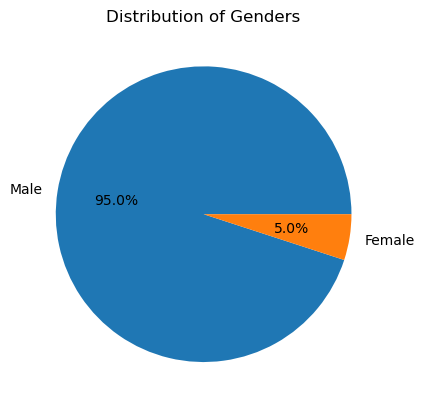

In [49]:
# Plot the distribution of genders
genres = HSE_df["Gender"].value_counts()
# Convert the data to percentages
percentages = 100 * genres / genres.sum()
# Create a pie chart
plt.pie(percentages, labels=genres.index, autopct="%.1f%%")
plt.title("Distribution of Genders")
print()
print()
plt.show()

The distribution of Genders shows that there are more Male employees (95%) than Female employees which could be indicative of the dearth of female employees in industrial sectors traditionally that are male-dominated.

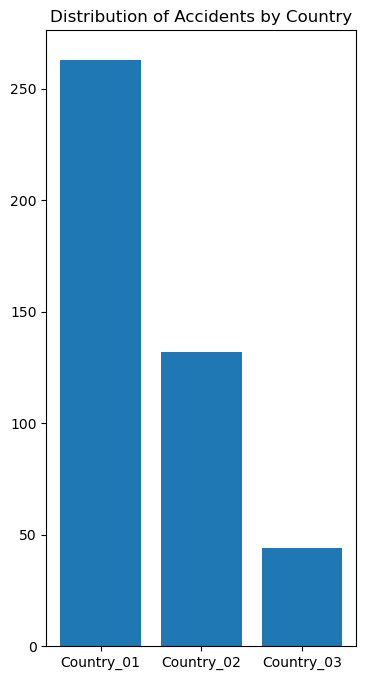

In [51]:
# Plot the distribution of Accidents by Country
country = HSE_df["Country"].value_counts()
# Increase the size of the chart
plt.figure(figsize=(4, 8))
plt.bar(country.index, country.values)
plt.title("Distribution of Accidents by Country")
plt.show()

From the Distribution of Accidents by Country, it shows that a significant number of the reported accidents occurred in Country_01, followed by Country_02 having more and Country_03 having lower number of cases were reported.

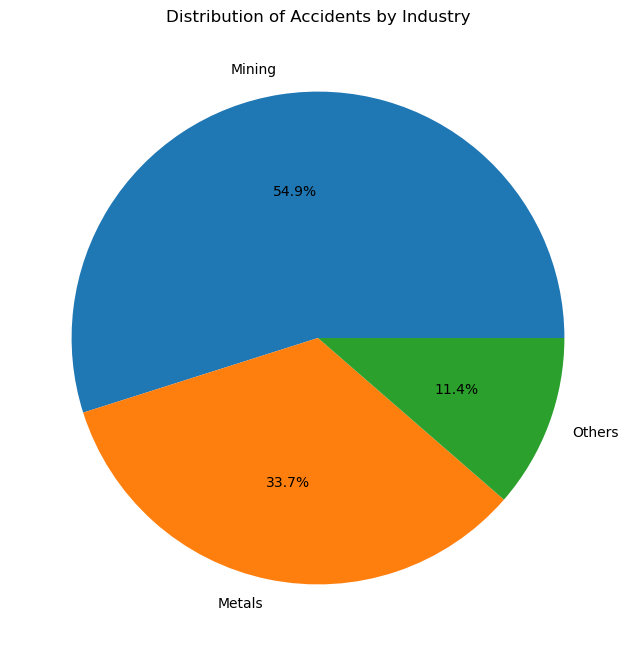

In [53]:
# Plot the distribution of Accidents by Industry Sector
industry_sectors = HSE_df["Industry Sector"].value_counts()

# Increase the size of the chart
plt.figure(figsize=(12, 8))

# Convert the data to percentages
percentages = 100 * industry_sectors / industry_sectors.sum()

# Create a pie chart
plt.pie(percentages, labels=industry_sectors.index, autopct="%.1f%%")
plt.title("Distribution of Accidents by Industry")
print()
print()
plt.show()

From the Distribution of Accidents by Industry, it shows that a significant number of the reported accidents occurred in Mining, followed by Metals with 33.7% then Others with 11.4%

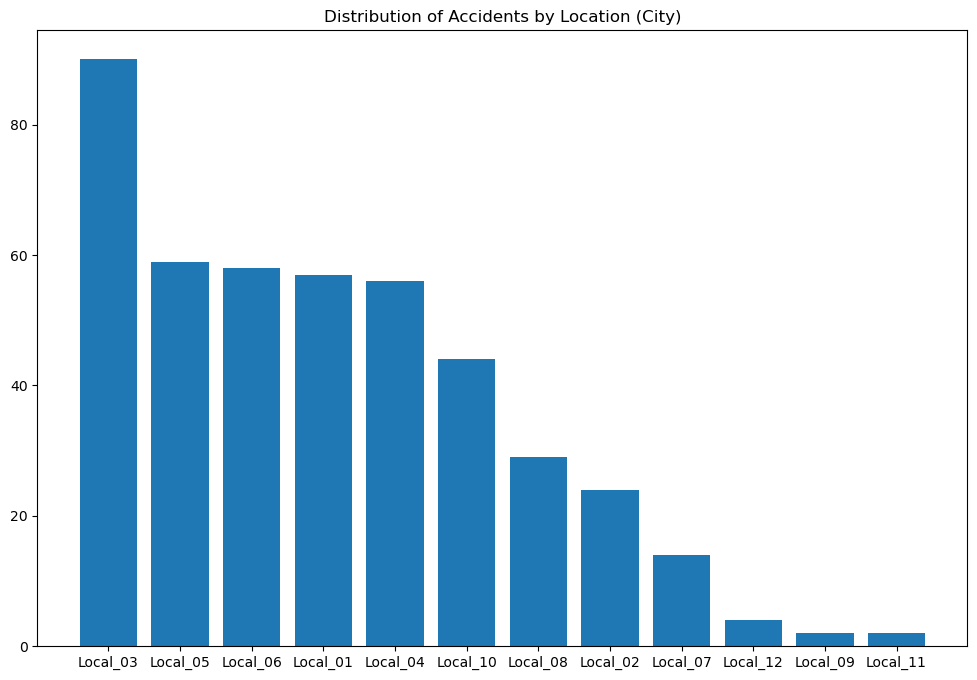

In [55]:


# Plot the distribution of Accidents by Location
location = HSE_df["Location"].value_counts()
# Increase the size of the chart
plt.figure(figsize=(12, 8))
plt.bar(location.index, location.values)
plt.title("Distribution of Accidents by Location (City)")
plt.show()



From the Distribution of Accidents by Location (City), it shows that a significant number of the reported accidents occurred in Local_03 and the least number of accidents were reported in Local_12, Local_09 and Local_11.

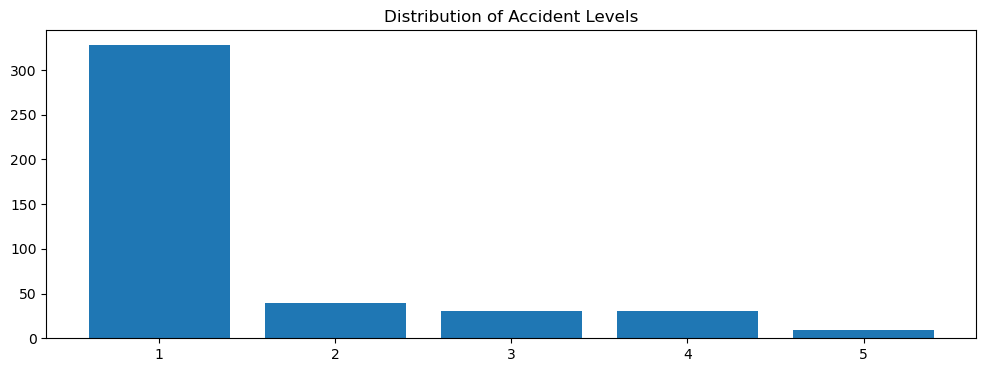

In [57]:
# Plot the distribution of Accidents by Accident Level
accident_levels = HSE_df["Accident Level"].value_counts()
# Increase the size of the chart
plt.figure(figsize=(12, 4))
plt.bar(accident_levels.index, accident_levels.values)
plt.title("Distribution of Accident Levels")
plt.show()


The distribution of Accident Levels shows that the most reported accidents are Level I, which indicates a minor accident. The second most common accident level is Level II.

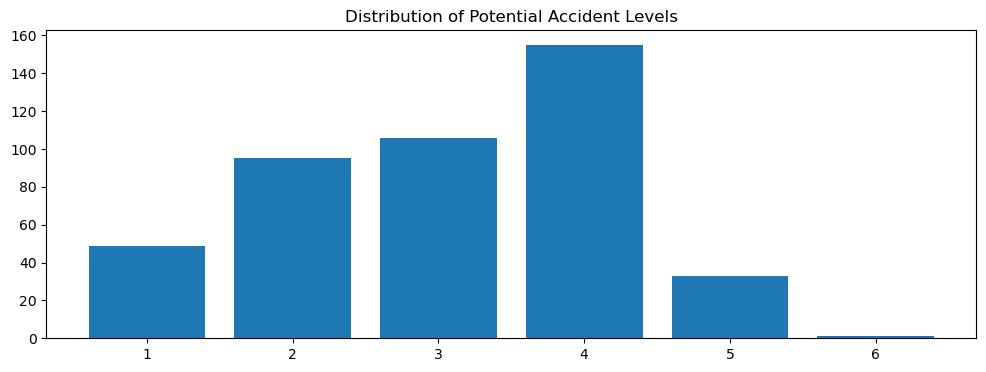

In [59]:


# Plot the distribution of potential accident levels
potential_accident_levels = HSE_df["Potential Accident Level"].value_counts()
# Increase the size of the chart
plt.figure(figsize=(12, 4))
plt.bar(potential_accident_levels.index, potential_accident_levels.values)
plt.title("Distribution of Potential Accident Levels")
plt.show()



The distribution of Potential Accident Levels shows that the most reported accidents have a Potential Level of Level 4, followed by Level 3.

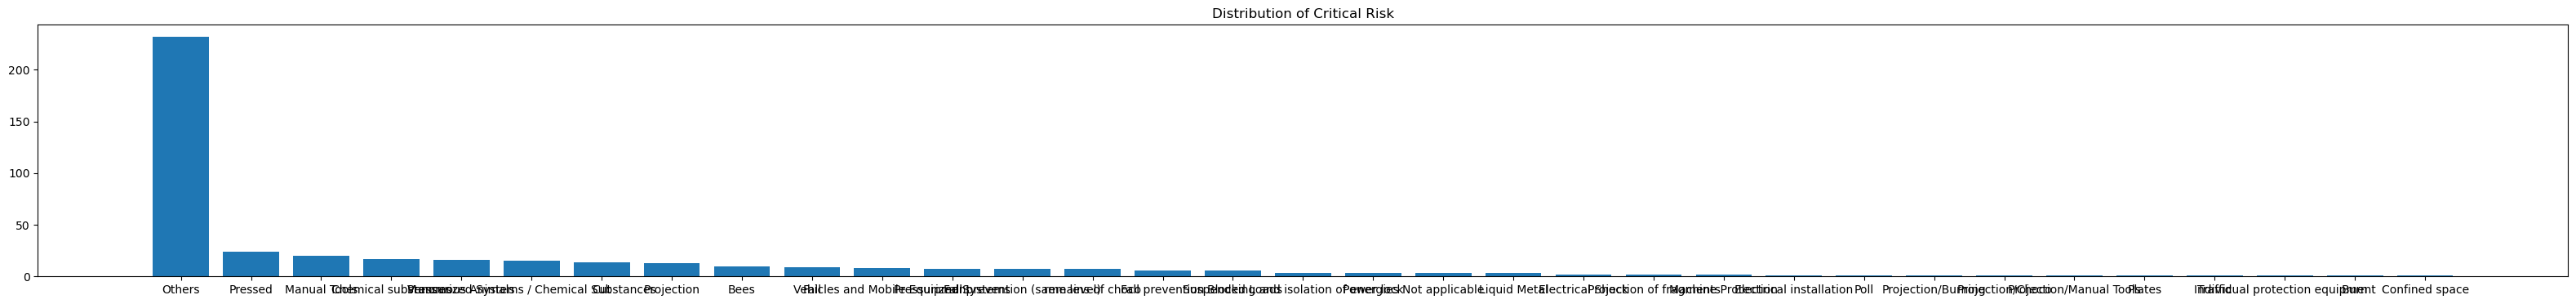

In [61]:
# Plot the distribution of critical risk
critical_risk = HSE_df["Critical Risk"].value_counts()
# Increase the size of the chart
plt.figure(figsize=(40, 4)) # I used a size of 40X4 so the values on the x-axis could be seen a little better
plt.bar(critical_risk.index, critical_risk.values)
plt.title("Distribution of Critical Risk")
plt.show()

The distribution of Critical Risk shows that the majority of accidents reported were not classified or considered to be critical as they were categorised as "Others". A number of significant of accidents accidents reported were "Pressed, Manual tools and Chemical substances" which are indicative of Hand, Finger and Chemical handling injuries.

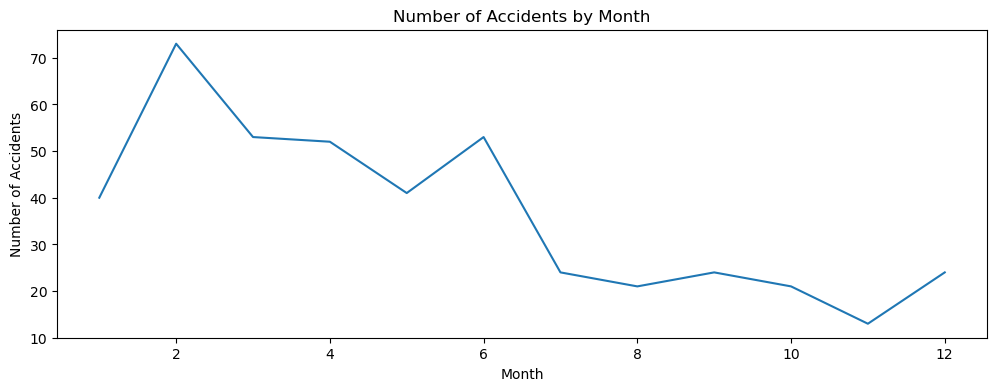

In [63]:


# Increase the size of the chart
plt.figure(figsize=(12, 4))
# Plot the number of accidents by month using a line chart
plt.plot(accidents_by_month)
plt.title("Number of Accidents by Month")
plt.xlabel("Month")
plt.ylabel("Number of Accidents")
plt.show()



The distribution of Accidents by Month shows that the significant number of reported accidents occurs during the first half of the year, dipping during the end of the year. With February (Highest reported case), March all the way to June having more reported cases compared to the rest of the year. There is also an indication that reported cases start spiking from December after a noticeable drop in November.

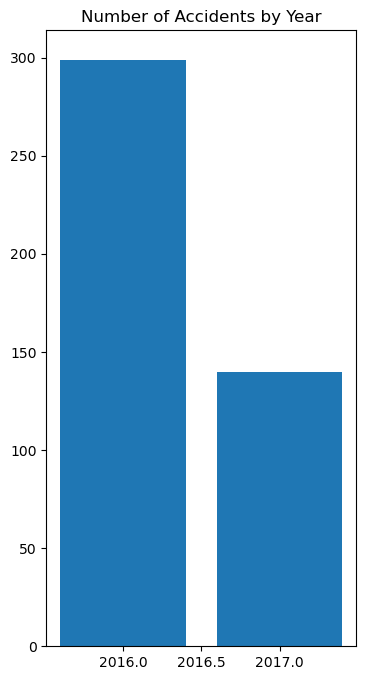

In [65]:


# Plot the distribution of accidents by year
accidents_by_year = HSE_df["year"].value_counts()
plt.figure(figsize=(4, 8))
plt.bar(accidents_by_year.index, accidents_by_year.values)
plt.title("Number of Accidents by Year")
plt.show()



From the Number of Accidents by Year, it shows that a significant number of the reported accidents were recorded in the year 2016, and a lower number of cases were reported and recorded in the year 2017; This could be due to the implementation of learnings from incidents, training and other health and safety control measures.

### NLP to Determine Line of Fire Accidents¶

Line of fire accidents are a type of accident that occurs when a person is in the path of a moving object or the release of hazardous energy.

    Manual Tools
    Suspended Loads
    Vehicles and Mobile Equipment
    Pressurized Systems
    Pressurized Systems/ Chemicals Substances
    Liquid Metal
    Projection/Burning
    Falling objects



In [68]:
# Create a new column to indicate if the accident is a Line of Fire Accident (Displayed as True or False)
HSE_df["Line of Fire Accident"] = HSE_df["Critical Risk"].apply(lambda x: x == "Pressed" or x == "Manual Tools" or x ==  "Suspended Loads" or x ==  "Vehicles and Mobile Equipment" or x ==  "Pressurized Systems" or x ==  "Pressurized Systems/ Chemicals Substances" or x ==  "Liquid Metal" or x ==  "Projection/Burning" or x ==  "Falling objects")
HSE_df.head()

,Date,Country,Location,Industry Sector,Accident Level,Potential Accident Level,Gender,Employee or Contractor,Critical Risk,day,month,year,Line of Fire Accident
0,2016-01-01,Country_01,Local_01,Mining,1,4,Male,Contractor,Pressed,1,1,2016,True
1,2016-01-02,Country_02,Local_02,Mining,1,4,Male,Employee,Pressurized Systems,2,1,2016,True
2,2016-01-06,Country_01,Local_03,Mining,1,3,Male,Contractor (Remote),Manual Tools,6,1,2016,True
3,2016-01-08,Country_01,Local_04,Mining,1,1,Male,Contractor,Others,8,1,2016,False
4,2016-01-10,Country_01,Local_04,Mining,4,4,Male,Contractor,Others,10,1,2016,False


### Line Chart: Distribution Line of Fire Accidents By Month

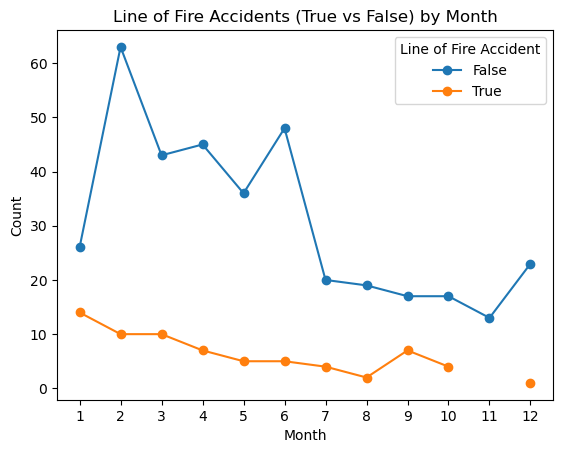

In [70]:
# Extract month from the date column
HSE_df['Month'] = pd.to_datetime(HSE_df['Date']).dt.month
# Group the data by month and "Line of Fire Accident" category and count occurrences
grouped = HSE_df.groupby(['Month', 'Line of Fire Accident']).size().unstack()
# Plot the line chart
grouped.plot(kind='line', marker='o')
plt.title("Line of Fire Accidents (True vs False) by Month")
plt.xlabel("Month")
plt.ylabel("Count")
  # Assuming data spans 12 months
plt.xticks(range(1, 13))
plt.legend(title='Line of Fire Accident')
plt.show()

In [71]:
# Plot the distribution of Line of Accidents by Industry Sector
industry_sectors = HSE_df["Industry Sector"].value_counts()
# Count the number of trues in the `Line of Fire Accidents` column
lofa_trues = HSE_df["Line of Fire Accident"].sum()

# Calculate the number of line of fire accidents by industry sector
industry_sectors_with_lofa = HSE_df.groupby("Industry Sector")["Line of Fire Accident"].sum()

# Print the results
print(f"Number of line of fire accidents: {lofa_trues}")
print(industry_sectors_with_lofa)

Number of line of fire accidents: 69
Industry Sector
Metals    46
Mining    22
Others     1
Name: Line of Fire Accident, dtype: int64


### Bar Chart: Distribution Line of Fire Accidents By Industry

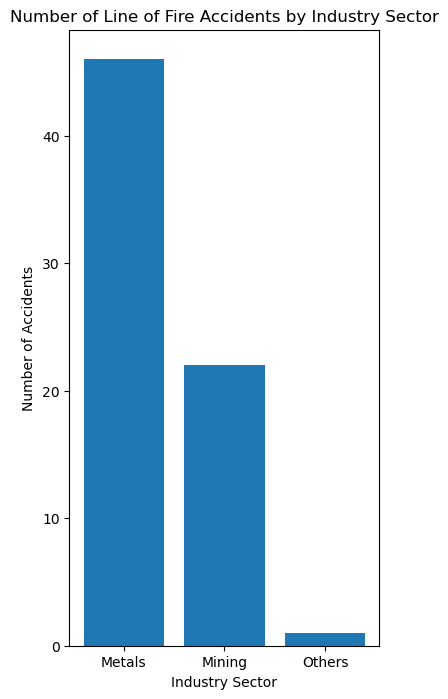

In [73]:
# Create a bar chart of the number of line of fire accidents by industry sector
plt.figure(figsize=(4, 8))
plt.bar(industry_sectors_with_lofa.index, industry_sectors_with_lofa.values)

# Add a title and labels to the axes
plt.title("Number of Line of Fire Accidents by Industry Sector")
plt.xlabel("Industry Sector")
plt.ylabel("Number of Accidents")

# Show the plot
plt.show()

The data shows that there were a total of 69 Line of Fire accidents. Of these accidents, 46 occurred in the Metals industry, 22 occurred in the mining industry, and 1 occurred in other industries.


## Conclusion

The statistical analysis of the dataset reveals several important insights into the nature and distribution of workplace accidents:

    Accident Severity: The most frequently reported accident severity level was Level I, indicating a high occurrence of minor incidents.

    Critical Risks: The most commonly recorded critical risk category was "Others," which refers to risks not explicitly defined in the dataset. This suggests the presence of emerging or poorly understood hazards that require further investigation and proper categorization.

    Body Parts Affected: Injuries involving the hands and fingers were particularly significant, highlighting the need for targeted protective measures and awareness.

    Industry Sectors:

        The Metals industry emerged as the most hazardous in terms of Line of Fire incidents, likely due to the use of heavy equipment and exposure to dangerous materials.

        Overall, the Mining and Metals sectors accounted for the majority of reported accidents.

    Demographics & Employment Type:

        Most incidents involved male employees.

        A considerable proportion of the injured were contractors, emphasizing the need for consistent safety training and oversight for all workers, regardless of employment status.

    Common Risk Types: Apart from "Others," critical risks frequently cited included "pressed," "manual tools," and "chemicals"—pointing to operational and handling risks that could be addressed through improved safety protocols.

    Geographic Distribution: The highest number of recorded incidents occurred in Country_01, followed by Country_02 and Country_03. At the local level, Local_03 reported the most accidents.